In [ ]:
"""
What?

Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multiclass classification. 
It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best
separates the examples by their assigned class.

"""

In [5]:
# Import python modules
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

### Worked Example of LDA for Dimensionality

In [4]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5,
    random_state=7, n_classes=10)

# define the pipeline
steps = [('lda', LinearDiscriminantAnalysis(n_components=5)), ('m', GaussianNB())] 
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.314 (0.049)


In [ ]:
"""
How do we know that reducing 20 dimensions of input down to five is good
or the best we can do? We don’t; five was an arbitrary choice. A better 
approach is to evaluate the same transform and model with different 
numbers of input features and choose the number of features (amount of 
dimensionality reduction) that results in the best average performance.
"""

### Evaluate multiple options

In [6]:
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
      n_redundant=5, random_state=7, n_classes=10)
    return X, y

def get_models():
    models = dict()
    for i in range(1,10):
        steps = [('lda', LinearDiscriminantAnalysis(n_components=i)), ('m', GaussianNB())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return scores

In [7]:
# define dataset
X, y = get_dataset()

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.182 (0.032)
>2 0.235 (0.036)
>3 0.267 (0.038)
>4 0.303 (0.037)
>5 0.314 (0.049)
>6 0.314 (0.040)
>7 0.329 (0.042)
>8 0.343 (0.045)
>9 0.358 (0.056)


In [ ]:
"""
We can see a general trend of increased performance as the number of 
dimensions is increased. On this dataset, the results suggest a trade-off
in the number of dimensions vs. the classification accuracy of the model.
The results suggest using the default of nine components achieves the best
performance on this dataset, although with a gentle trade-off as fewer 
dimensions are used.
"""

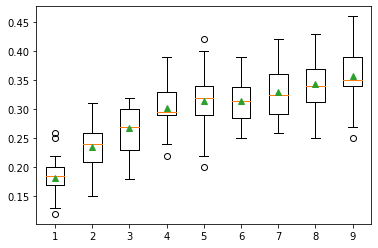

In [8]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()